Make sure to enable GPU on Google Colab for faster processing (select T4 GPU under Runtime -> Change runtime type -> Hardware accelerator -> GPU)

Install necessary libraries for sentiment analysis: torch, transformers, and other dependencies.

This will leverage the T4 GPU for faster model inference and training.

**Dataset**

The dataset is too large to upload directly to GitHub. You can download it from the following link:

https://drive.google.com/drive/folders/1TG5U3eN7eeml7Au_DrdRGtJi_C3fJ-8Q


**Pre requisites**
  
ML
  
DL - CNN - SER,LSTM's,GRUs - Tensorflow
    
**Alternative solutions - Performance enhancement**

Transformers,HuggingFace

GenAI

**Audio Datasets**

Signal/Audio processing - complex maths - Fourier Transform
    
**Libraries to be used**

1. numpy
2. pandas 
3. matplotlib 
4. seaborn 
5. librosa
6. scipy
7. pydub 
8. tensorflow / torch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [3]:
import os
from glob import glob
from IPython.display import Audio

In [ ]:
# !pip install librosa

In [4]:
import librosa
import librosa.display

In [5]:
path = "/content/drive/MyDrive/Extra/aud_dset/audio_data/"

In [6]:
data_actor_list = os.listdir(path)
print(data_actor_list)

['Actor_06', 'Actor_04', 'Actor_08', 'Actor_05', 'Actor_07', 'Actor_02', 'Actor_09', 'Actor_01', 'Actor_03', 'Actor_10']


#### Reading data from File/ Extracting x(independet features) and y(target variable) from audio data

In [9]:
s = "03-01-02-01-02-02-01.wav"
print(s.split('.'))
print(s.split('.')[0])
print(s.split('.')[0].split('-'))
print(s.split('.')[0].split('-')[2])

['03-01-02-01-02-02-01', 'wav']
03-01-02-01-02-02-01
['03', '01', '02', '01', '02', '02', '01']
02


In [10]:
emotion = []
file_path = []
for i in data_actor_list:
  actor = os.listdir(path + i)   # "/content/drive/MyDrive/Extra/aud_dset/audio_data/Actor_04"
  for a in actor:                # 03-01-02-01-02-02-01.wav
    part = a.split('.')[0].split('-')
    emotion.append(int(part[2]))
    file_path.append(path + i + '/' + a)  # /content/drive/MyDrive/Extra/aud_dset/audio_data/Actor_04/ 03-01-02-01-02-02-01.wav"


In [11]:
print(len(emotion))
print(len(file_path))

610
610


In [12]:
# Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry,
# 06 = fearful, 07 = disgust, 08 = surprised).
print(emotion[:10])
print(file_path[:5])

[4, 2, 4, 5, 2, 2, 1, 6, 3, 4]
['/content/drive/MyDrive/Extra/aud_dset/audio_data/Actor_06/03-01-04-02-01-02-06.wav', '/content/drive/MyDrive/Extra/aud_dset/audio_data/Actor_06/03-01-02-01-02-01-06.wav', '/content/drive/MyDrive/Extra/aud_dset/audio_data/Actor_06/03-01-04-02-02-02-06.wav', '/content/drive/MyDrive/Extra/aud_dset/audio_data/Actor_06/03-01-05-01-02-02-06.wav', '/content/drive/MyDrive/Extra/aud_dset/audio_data/Actor_06/03-01-02-02-02-01-06.wav']


In [13]:
df = pd.DataFrame({'Emotions':emotion,'Path':file_path})
df.head()

Emotions                                               Path
0         4  /content/drive/MyDrive/Extra/aud_dset/audio_da...
1         2  /content/drive/MyDrive/Extra/aud_dset/audio_da...
2         4  /content/drive/MyDrive/Extra/aud_dset/audio_da...
3         5  /content/drive/MyDrive/Extra/aud_dset/audio_da...
4         2  /content/drive/MyDrive/Extra/aud_dset/audio_da...

In [14]:
df['Emotions'] = df['Emotions'].replace({1: 'neutral', 2 : 'calm', 3 : 'happy', 4 : 'sad', 5 : 'angry',
6 : 'fearful', 7 : 'disgust', 8 : 'surprised'})
df.head()

Emotions                                               Path
0      sad  /content/drive/MyDrive/Extra/aud_dset/audio_da...
1     calm  /content/drive/MyDrive/Extra/aud_dset/audio_da...
2      sad  /content/drive/MyDrive/Extra/aud_dset/audio_da...
3    angry  /content/drive/MyDrive/Extra/aud_dset/audio_da...
4     calm  /content/drive/MyDrive/Extra/aud_dset/audio_da...

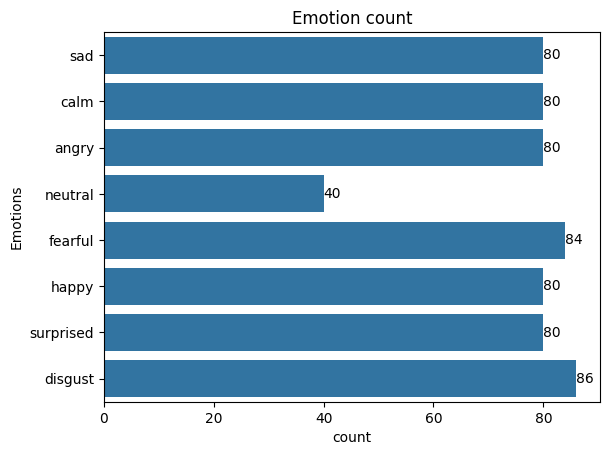

In [17]:
ax = sns.countplot(df['Emotions'])
ax.bar_label(ax.containers[0])
plt.title('Emotion count')
plt.show()

In [19]:
data,sr = librosa.load(file_path[0])
print(sr)

22050


In [27]:
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(90496,)


In [20]:
Audio(data,rate=sr)

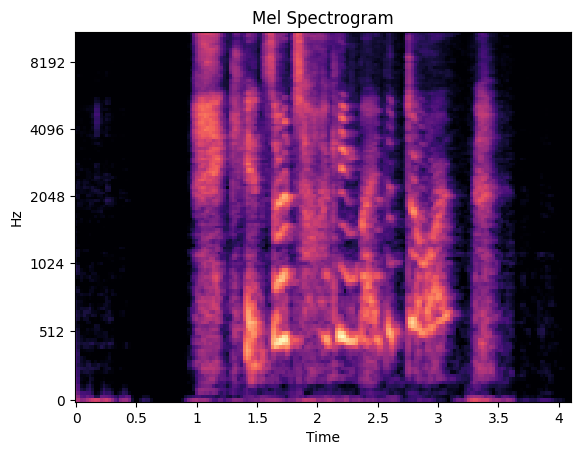

In [22]:
spec = librosa.feature.melspectrogram(y=data,sr=sr,n_mels=128,fmax=8000)
log_spec = librosa.power_to_db(spec)
librosa.display.specshow(log_spec,y_axis='mel',sr=sr,x_axis='time')
plt.title('Mel Spectrogram')
plt.show()

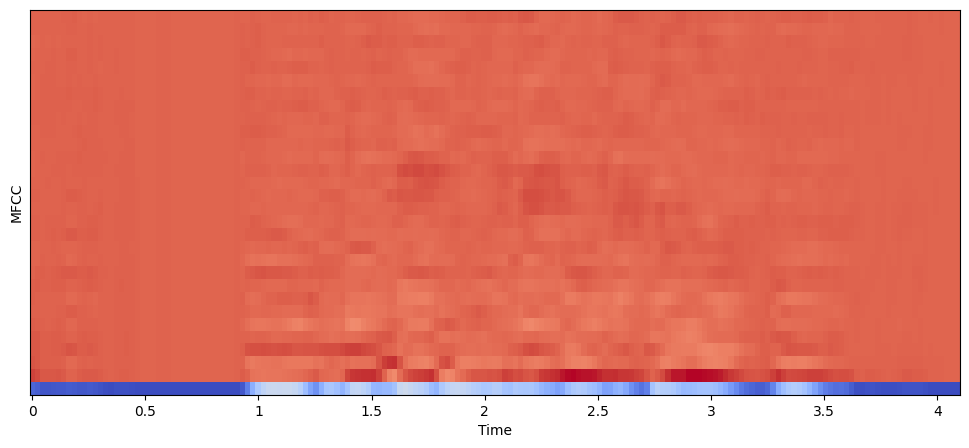

In [26]:
mfcc = librosa.feature.mfcc(y=data,sr=sr,n_mfcc=30)

plt.figure(figsize=(12,5))
librosa.display.specshow(mfcc,x_axis='time')
plt.ylabel('MFCC')
plt.show()

In [37]:
def plot_waveplot(data,sr,emot):
  librosa.display.waveshow(data,sr=sr)
  plt.title(f'Waveplot for audio for emotion {emot}')
  plt.show()

def plot_spec(data,sr,emot):
  x = librosa.stft(data)
  xdb = librosa.amplitude_to_db(abs(x))
  librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
  plt.title(f'Spectogram for audio with emotion {emot}')
  plt.show()

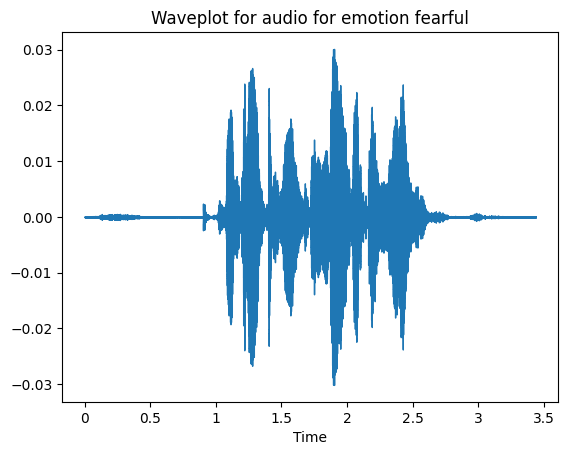

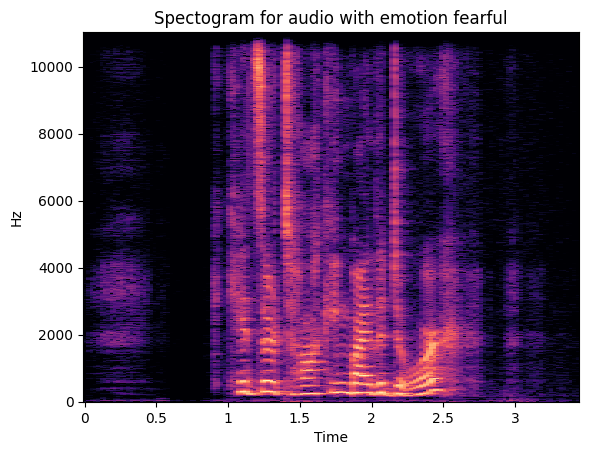

In [39]:
emo1 = 'fearful'
df_samp1 = df['Path'][df['Emotions']==emo1].iloc[1]
data,sr = librosa.load(df_samp1)
plot_waveplot(data,sr,emo1)
plot_spec(data,sr,emo1)
Audio(df_samp1)

In [40]:
df['Emotions'].unique()

array(['sad', 'calm', 'angry', 'neutral', 'fearful', 'happy', 'surprised',
       'disgust'], dtype=object)

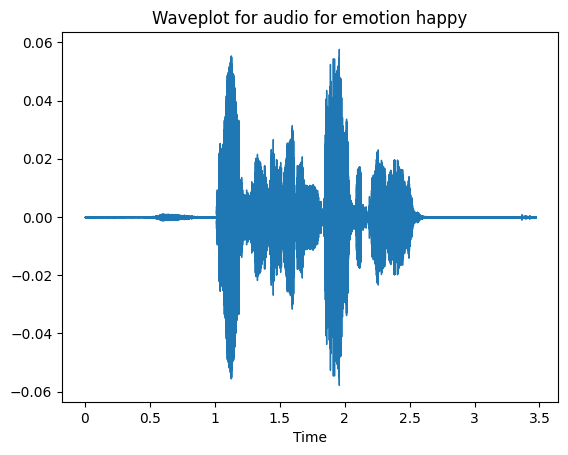

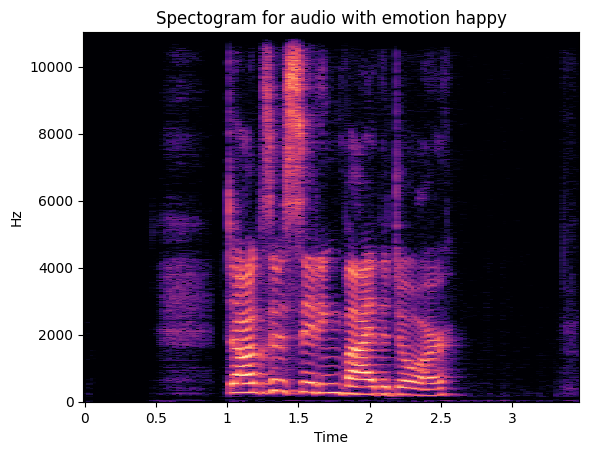

In [44]:
emo2 = 'happy'
df_samp2 = df['Path'][df['Emotions']==emo2].iloc[1]
data,sr = librosa.load(df_samp2)
plot_waveplot(data,sr,emo2)
plot_spec(data,sr,emo2)
Audio(df_samp2)

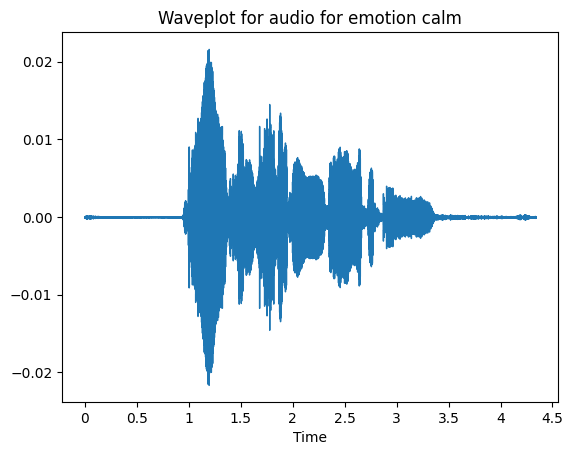

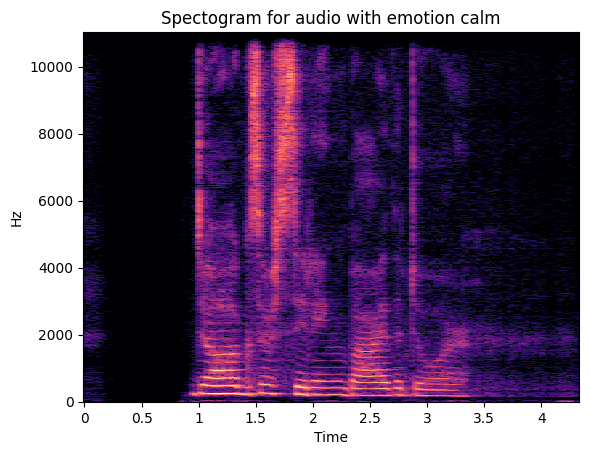

In [45]:
emo3 = 'calm'
df_samp3 = df['Path'][df['Emotions']==emo3].iloc[1]
data,sr = librosa.load(df_samp3)
plot_waveplot(data,sr,emo3)
plot_spec(data,sr,emo3)
Audio(df_samp3)

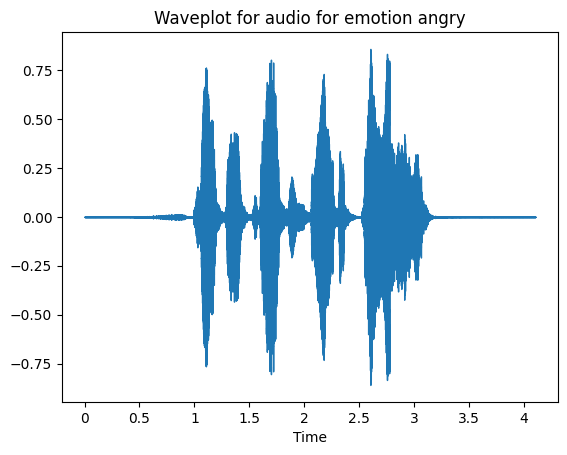

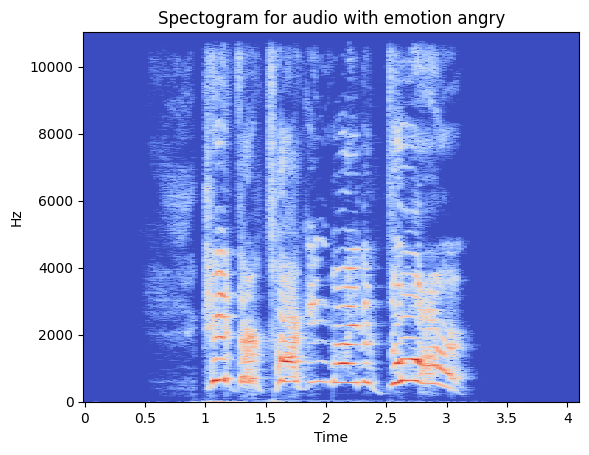

In [46]:
emo4 = 'angry'
df_samp4 = df['Path'][df['Emotions']==emo4].iloc[1]
data,sr = librosa.load(df_samp4)
plot_waveplot(data,sr,emo4)
plot_spec(data,sr,emo4)
Audio(df_samp4)

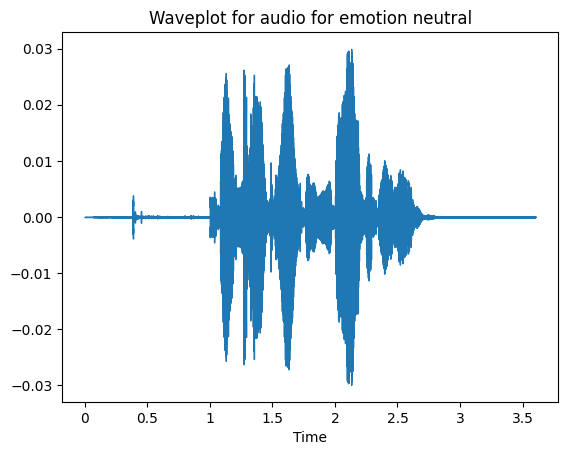

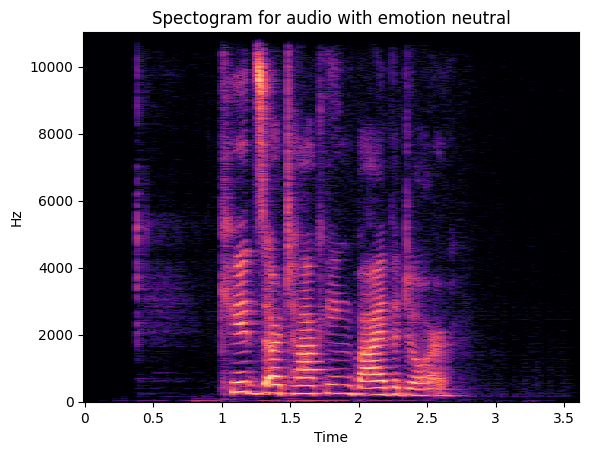

In [47]:
emo5 = 'neutral'
df_samp5 = df['Path'][df['Emotions']==emo5].iloc[1]
data,sr = librosa.load(df_samp5)
plot_waveplot(data,sr,emo5)
plot_spec(data,sr,emo5)
Audio(df_samp5)

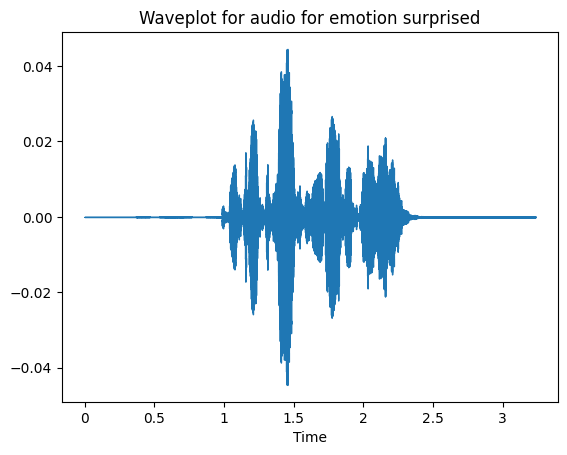

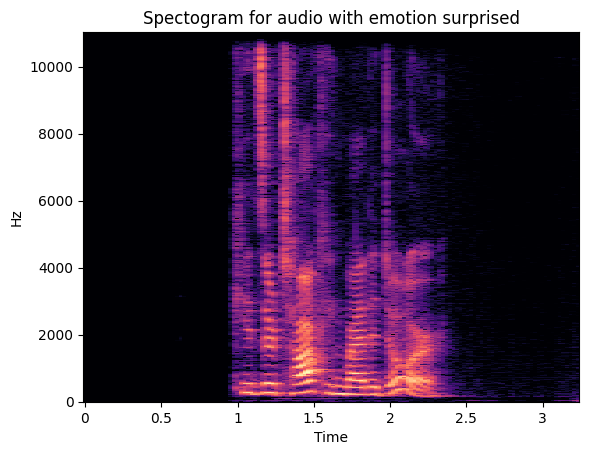

In [49]:
emo6 = 'surprised'
df_samp6 = df['Path'][df['Emotions']==emo6].iloc[1]
data,sr = librosa.load(df_samp6)
plot_waveplot(data,sr,emo6)
plot_spec(data,sr,emo6)
Audio(df_samp6)

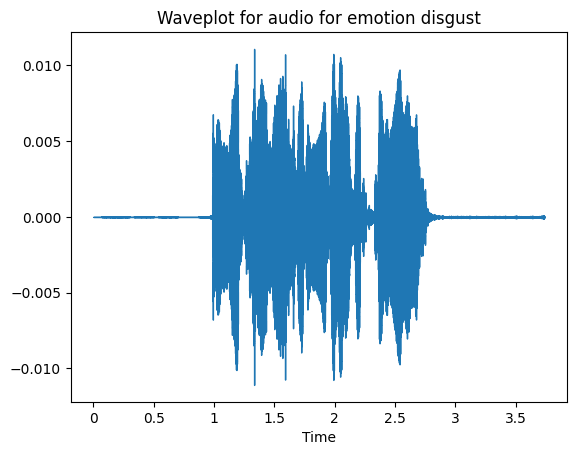

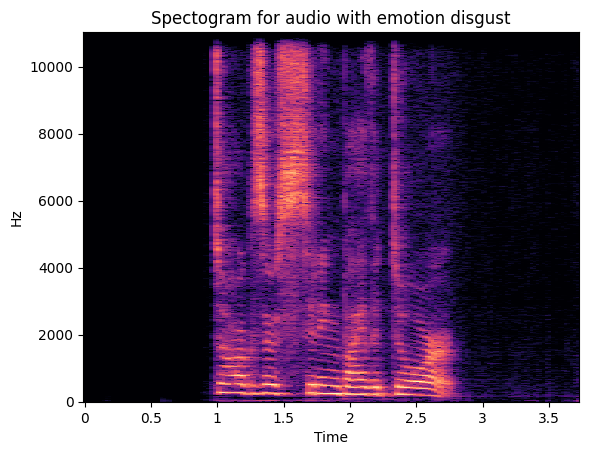

In [50]:
emo7 = 'disgust'
df_samp7 = df['Path'][df['Emotions']==emo7].iloc[1]
data,sr = librosa.load(df_samp7)
plot_waveplot(data,sr,emo7)
plot_spec(data,sr,emo7)
Audio(df_samp7)

### Data Augmentaion

In [58]:
def noise(data):
  noise_amp = 0.037*np.random.uniform()*np.max(data)
  data = data + noise_amp*np.random.normal(size=data.shape[0])
  return data

def strech(data,r=0.8):  # r<1 => slow down, r>1 => pace up
  return librosa.effects.time_stretch(data,rate=r)

def shift(data):
  shift_range = int(np.random.uniform(low=-5,high=5)*1000)
  return np.roll(data,shift_range)

def pitch(data,sampling_rate,pitch_factor=0.7):
  return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)


path1 = np.array(df['Path'])[1]
data,sr = librosa.load(path1)

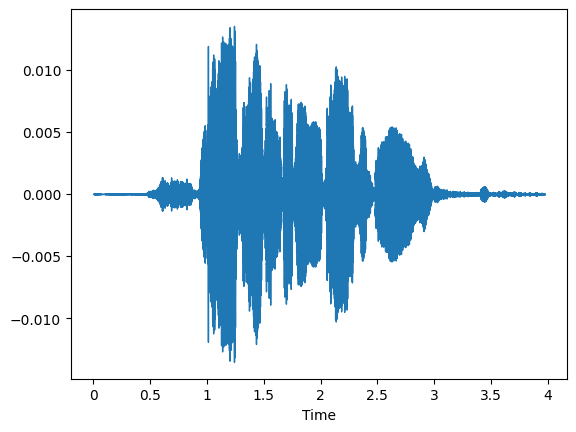

In [52]:
# Orignal Audio
librosa.display.waveshow(y=data,sr=sr)
Audio(path1)

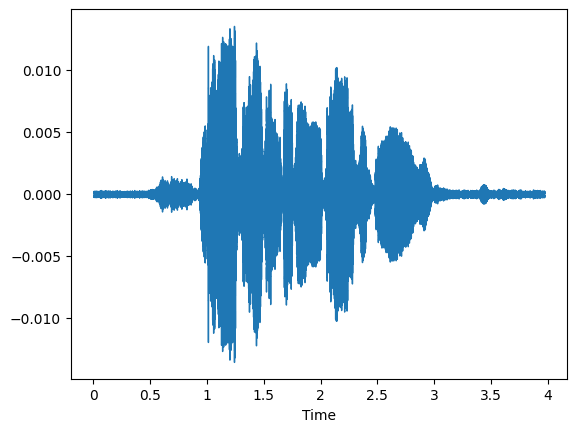

In [59]:
# Augment Noise
x = noise(data)
librosa.display.waveshow(y=x,sr=sr)
Audio(x,rate=sr)

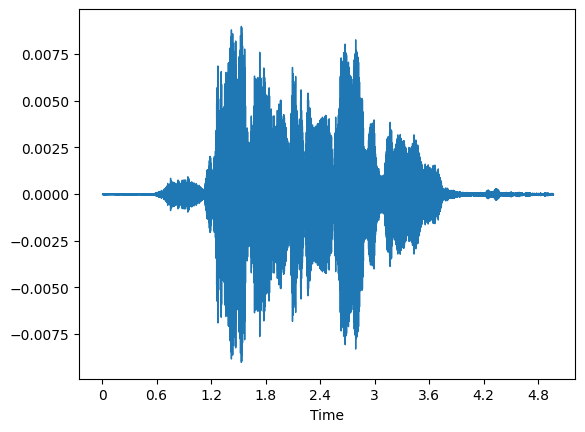

In [61]:
# Streching Audio
x = strech(data)
librosa.display.waveshow(y=x,sr=sr)
Audio(x,rate=sr)

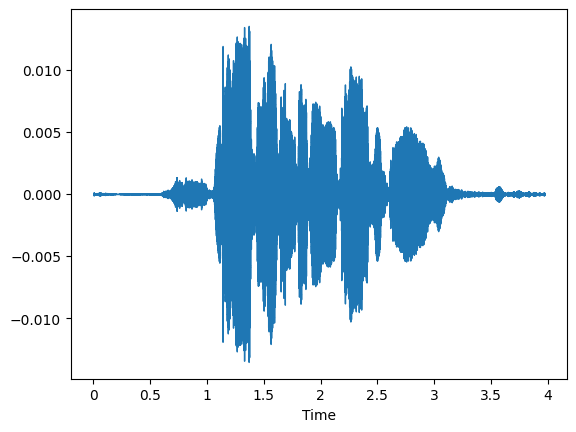

In [62]:
# Shifting Audio
x = shift(data)
librosa.display.waveshow(y=x,sr=sr)
Audio(x,rate=sr)

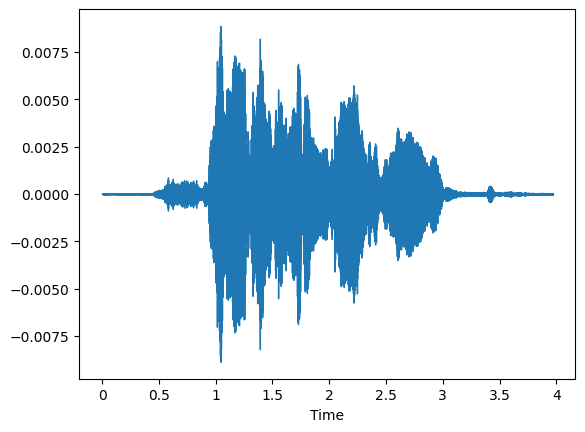

In [63]:
# Augmenting with Pitch
x = pitch(data,sr)
librosa.display.waveshow(y=x,sr=sr)
Audio(x,rate=sr)

### Feature Extraction

In [64]:
df.shape

(610, 2)

In [65]:
def extract_features(data):
  # ZCR
  result = np.array([])
  zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T,axis=0)
  result = np.hstack((result,zcr))

  # Chroma STFT
  stft = np.abs(librosa.stft(data))
  chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft,sr=sr).T,axis=0)
  result = np.hstack((result,chroma_stft))

  # MFCC
  mfcc = np.mean(librosa.feature.mfcc(y=data,sr=sr).T,axis=0)
  result = np.hstack((result,mfcc))

  # RMS Energy
  rms = np.mean(librosa.feature.rms(y=data).T,axis=0)
  result = np.hstack((result,rms))

  # Mel Spec
  mel = np.mean(librosa.feature.melspectrogram(y=data,sr=sr).T,axis=0)
  result = np.hstack((result,mel))

  return result


In [66]:
def fecth_features(path):
  data,sr = librosa.load(path,duration=2.5,offset=0.6)

# without augmenation
  res1 = extract_features(data)
  result = np.array(res1)

# Noise
  noisy_data = noise(data)
  res2 =  extract_features(noisy_data)
  result = np.vstack((result,res2))

#  stretch and pitch
  st_data = strech(data)
  pitch_data = pitch(st_data,sr)
  res3 = extract_features(pitch_data)
  result = np.vstack((result,res3))

  return result

In [67]:
x, y = [],[]
for path,emotion in zip(df['Path'],df['Emotions']):
  feature = fecth_features(path)
  for i in feature:
    x.append(i)
    y.append(emotion)

In [68]:
print(len(x),len(y))

1830 1830


In [69]:
features = pd.DataFrame(x)
features['labels'] = y
features.head()

0         1         2         3         4         5         6  \
0  0.186076  0.517693  0.476812  0.488588  0.469091  0.476790  0.469581   
1  0.318093  0.659076  0.639636  0.646624  0.634469  0.647473  0.589994   
2  0.221958  0.648692  0.573683  0.533585  0.502734  0.444512  0.490459   
3  0.137845  0.370755  0.438029  0.376276  0.363898  0.405992  0.447736   
4  0.215101  0.477871  0.564737  0.522614  0.497512  0.524296  0.497986   

          7         8         9  ...       153       154       155       156  \
0  0.495419  0.551102  0.628735  ...  0.000095  0.000186  0.000245  0.000109   
1  0.596346  0.644941  0.717853  ...  0.000114  0.000203  0.000262  0.000124   
2  0.500253  0.554036  0.627493  ...  0.000009  0.000013  0.000029  0.000065   
3  0.611152  0.543074  0.555603  ...  0.000047  0.000046  0.000062  0.000096   
4  0.643460  0.609703  0.617620  ...  0.000060  0.000060  0.000075  0.000107   

        157       158       159       160           161  labels  
0  0.000068  0.000027  0.000019  0.000022  1.358895e-06     sad  
1  0.000083  0.000040  0.000034  0.000038  1.662098e-05     sad  
2  0.000037  0.000018  0.000006  0.000002  1.870157e-07     sad  
3  0.000110  0.000085  0.000047  0.000027  1.991855e-06    calm  
4  0.000120  0.000096  0.000059  0.000038  1.293048e-05    calm  

[5 rows x 163 columns]

In [87]:
x = features.drop('labels',axis=1)
y = features['labels']
print(x.shape)
print(y.shape)

(1830, 162)
(1830,)


In [88]:
set(y)

{'angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised'}

In [89]:
y.head()

0     sad
1     sad
2     sad
3    calm
4    calm
Name: labels, dtype: object

In [90]:
en = OneHotEncoder()
Y = en.fit_transform(np.array(y).reshape(-1,1)).toarray()
Y[:10]

array([[0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.]])

In [92]:
x_train,x_test,y_train,y_test = train_test_split(x,Y,random_state=0,shuffle=True)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)


(1372, 162) (458, 162)
(1372, 8) (458, 8)


In [93]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)


(1372, 162) (458, 162)
(1372, 8) (458, 8)


In [94]:
x_train = x_train.reshape(1372,162,1)
x_test = x_test.reshape(458,162,1)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(1372, 162, 1) (458, 162, 1)
(1372, 8) (458, 8)


In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

In [96]:
m1 = Sequential()
m1.add(Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu',input_shape=(x_train.shape[1],1)))
m1.add(MaxPooling1D(pool_size=5,strides=2,padding='same'))

m1.add(Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'))
m1.add(MaxPooling1D(pool_size=5,strides=2,padding='same'))

m1.add(Conv1D(128,kernel_size=5,strides=1,padding='same',activation='relu'))
m1.add(MaxPooling1D(pool_size=5,strides=2,padding='same'))
m1.add(Dropout(0.2))

m1.add(Conv1D(64,kernel_size=5,strides=1,padding='same',activation='relu'))
m1.add(MaxPooling1D(pool_size=5,strides=2,padding='same'))

m1.add(Flatten())
m1.add(Dense(32,activation='relu'))
m1.add(Dropout(0.3))

m1.add(Dense(8,activation='softmax'))

m1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

m1.summary()




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)                    │ (None, 162, 256)            │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 81, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 81, 256)             │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_9 (MaxPooling1D)       │ (None, 41, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_10 (Conv1D)                   │ (None, 41, 128)             │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_10 (MaxPooling1D)      │ (None, 21, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 21, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_11 (Conv1D)                   │ (None, 21, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_11 (MaxPooling1D)      │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 704)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │          22,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 557,288 (2.13 MB)

 Trainable params: 557,288 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

In [97]:
rlrp = ReduceLROnPlateau(monitor='loss',factor=-.4,patience=2,min_lr=0.00000001)
h1 = m1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 297ms/step - acc: 0.1780 - loss: 2.0552 - val_acc: 0.2314 - val_loss: 1.9340
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - acc: 0.2289 - loss: 1.9693 - val_acc: 0.2576 - val_loss: 1.8599
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2391 - loss: 1.8857 - val_acc: 0.2969 - val_loss: 1.8565
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2664 - loss: 1.8795 - val_acc: 0.2904 - val_loss: 1.8066
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2808 - loss: 1.8427 - val_acc: 0.2948 - val_loss: 1.7637
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.2683 - loss: 1.8065 - val_acc: 0.3057 - val_loss: 1.7647
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3067 - loss: 1.7710 - val_acc: 0.3450 - val_loss: 1.7008
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3431 - loss: 1.7393 - val_acc: 0.3646 - val_loss: 1.6459
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3310 - los

In [100]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

acc      loss   val_acc  val_loss  Epochs
45  0.895044  0.304730  0.670306  1.218408      45
46  0.900146  0.289032  0.641921  1.460957      46
47  0.884840  0.329150  0.631004  1.374113      47
48  0.895773  0.307467  0.674672  1.365800      48
49  0.913265  0.264311  0.644105  1.377335      49

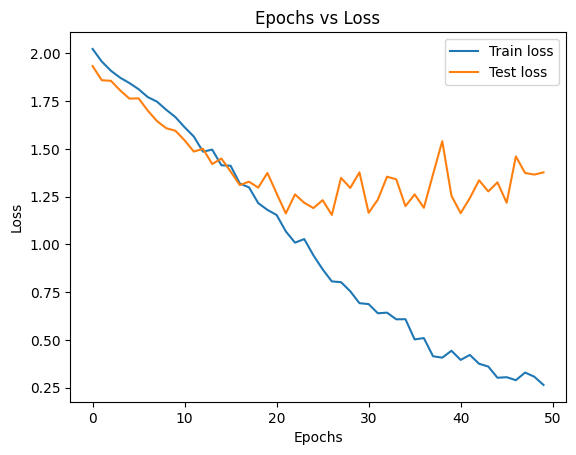

In [103]:
plt.plot(r1['Epochs'],r1['loss'],label='Train loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Test loss')
plt.title('Epochs vs Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

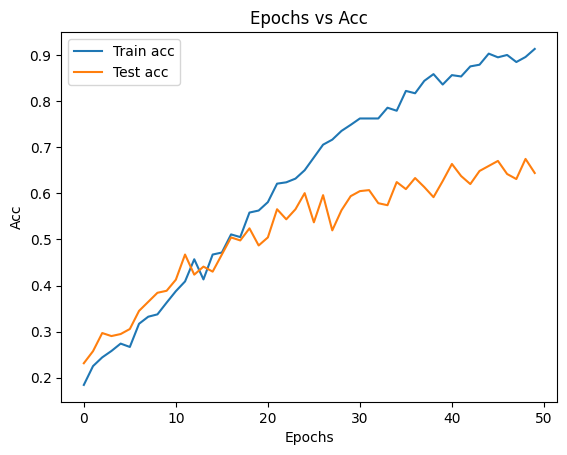

In [104]:
plt.plot(r1['Epochs'],r1['acc'],label='Train acc')
plt.plot(r1['Epochs'],r1['val_acc'],label='Test acc')
plt.title('Epochs vs Acc')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.show()